# Install & Import Dependencies

In [1]:
!pip install neuralprophet

  Using cached neuralprophet-0.3.2-py3-none-any.whl (74 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.15-py3-none-any.whl (181 kB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached torch_lr_finder-0.2.1-py3-none-any.whl (11 kB)
  Using cached PyMeeus-0.5.11-py3-none-any.whl
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached ephem-4.1.3-cp38-cp38-win_amd64.whl (1.4 MB)


In [41]:
!pip install -q neuralprophet

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from neuralprophet import NeuralProphet
import pickle



# Read in Data & Process Data

In [22]:
df=pd.read_csv("user-interactions.csv",index_col=[0],parse_dates=["updated_at"],squeeze=True)

In [23]:
df.head()

,user_id,pratilipi_id,read_percent,updated_at
0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [24]:
df.columns

Index(['user_id', 'pratilipi_id', 'read_percent', 'updated_at'], dtype='object')

In [25]:
df.dtypes

user_id                  int64
pratilipi_id             int64
read_percent           float64
updated_at      datetime64[ns]
dtype: object

In [26]:
print("Number of user_id:",df["user_id"].nunique())
print("Number of pratilipi_id:",df["pratilipi_id"].nunique())
print("Number of read_percent:",df["read_percent"].nunique())

Number of user_id: 355988
Number of pratilipi_id: 373138
Number of read_percent: 24772


In [27]:
df["read_percent"]=df["read_percent"].astype("int")

In [28]:
df.isnull().sum()

user_id         0
pratilipi_id    0
read_percent    0
updated_at      0
dtype: int64

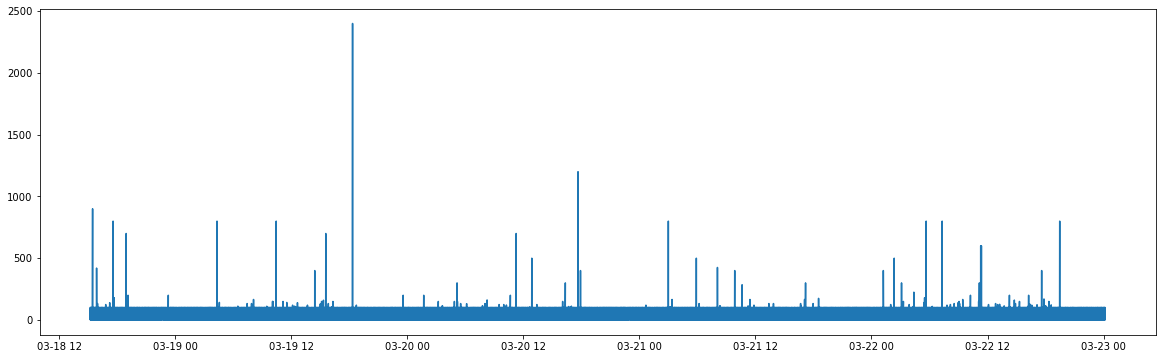

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

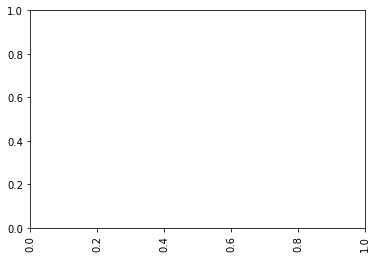

In [29]:
plt.figure(figsize=(20,6))
plt.plot(df["updated_at"],df["read_percent"])
plt.show()
plt.xticks(rotation=90)

(array([19069.5, 19070. , 19070.5, 19071. , 19071.5, 19072. , 19072.5,
        19073. , 19073.5, 19074. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

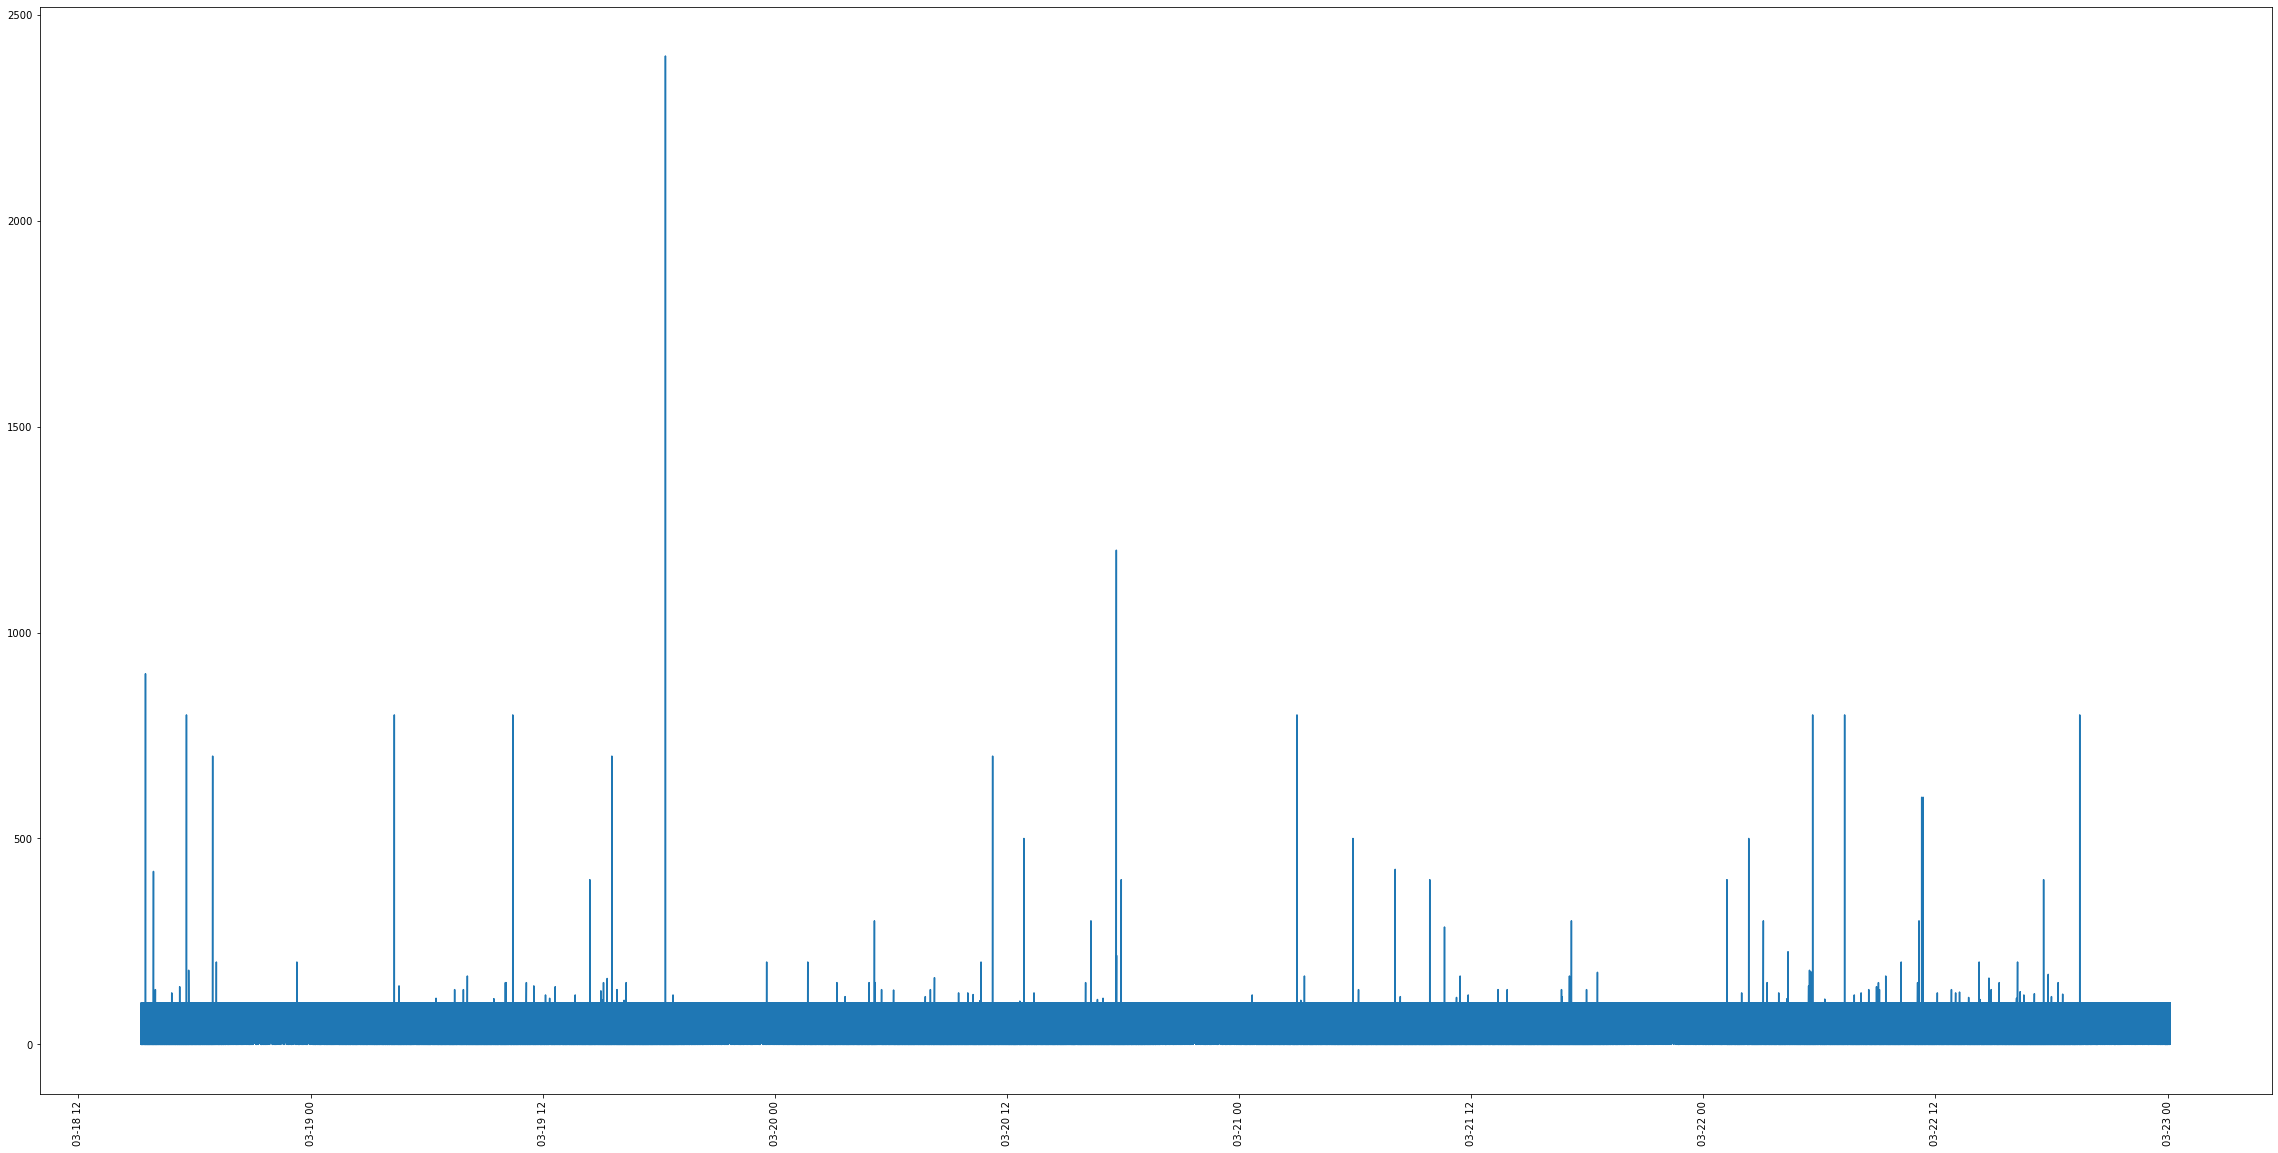

In [30]:

plt.figure(figsize=(40,20))
df["Year"] = df["updated_at"].apply(lambda x: x.year)
df = df[df["Year"]<=2022]
plt.plot(df["updated_at"],df["read_percent"])
plt.xticks(rotation=90)

(array([19069.5, 19070. , 19070.5, 19071. , 19071.5, 19072. , 19072.5,
        19073. , 19073.5, 19074. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

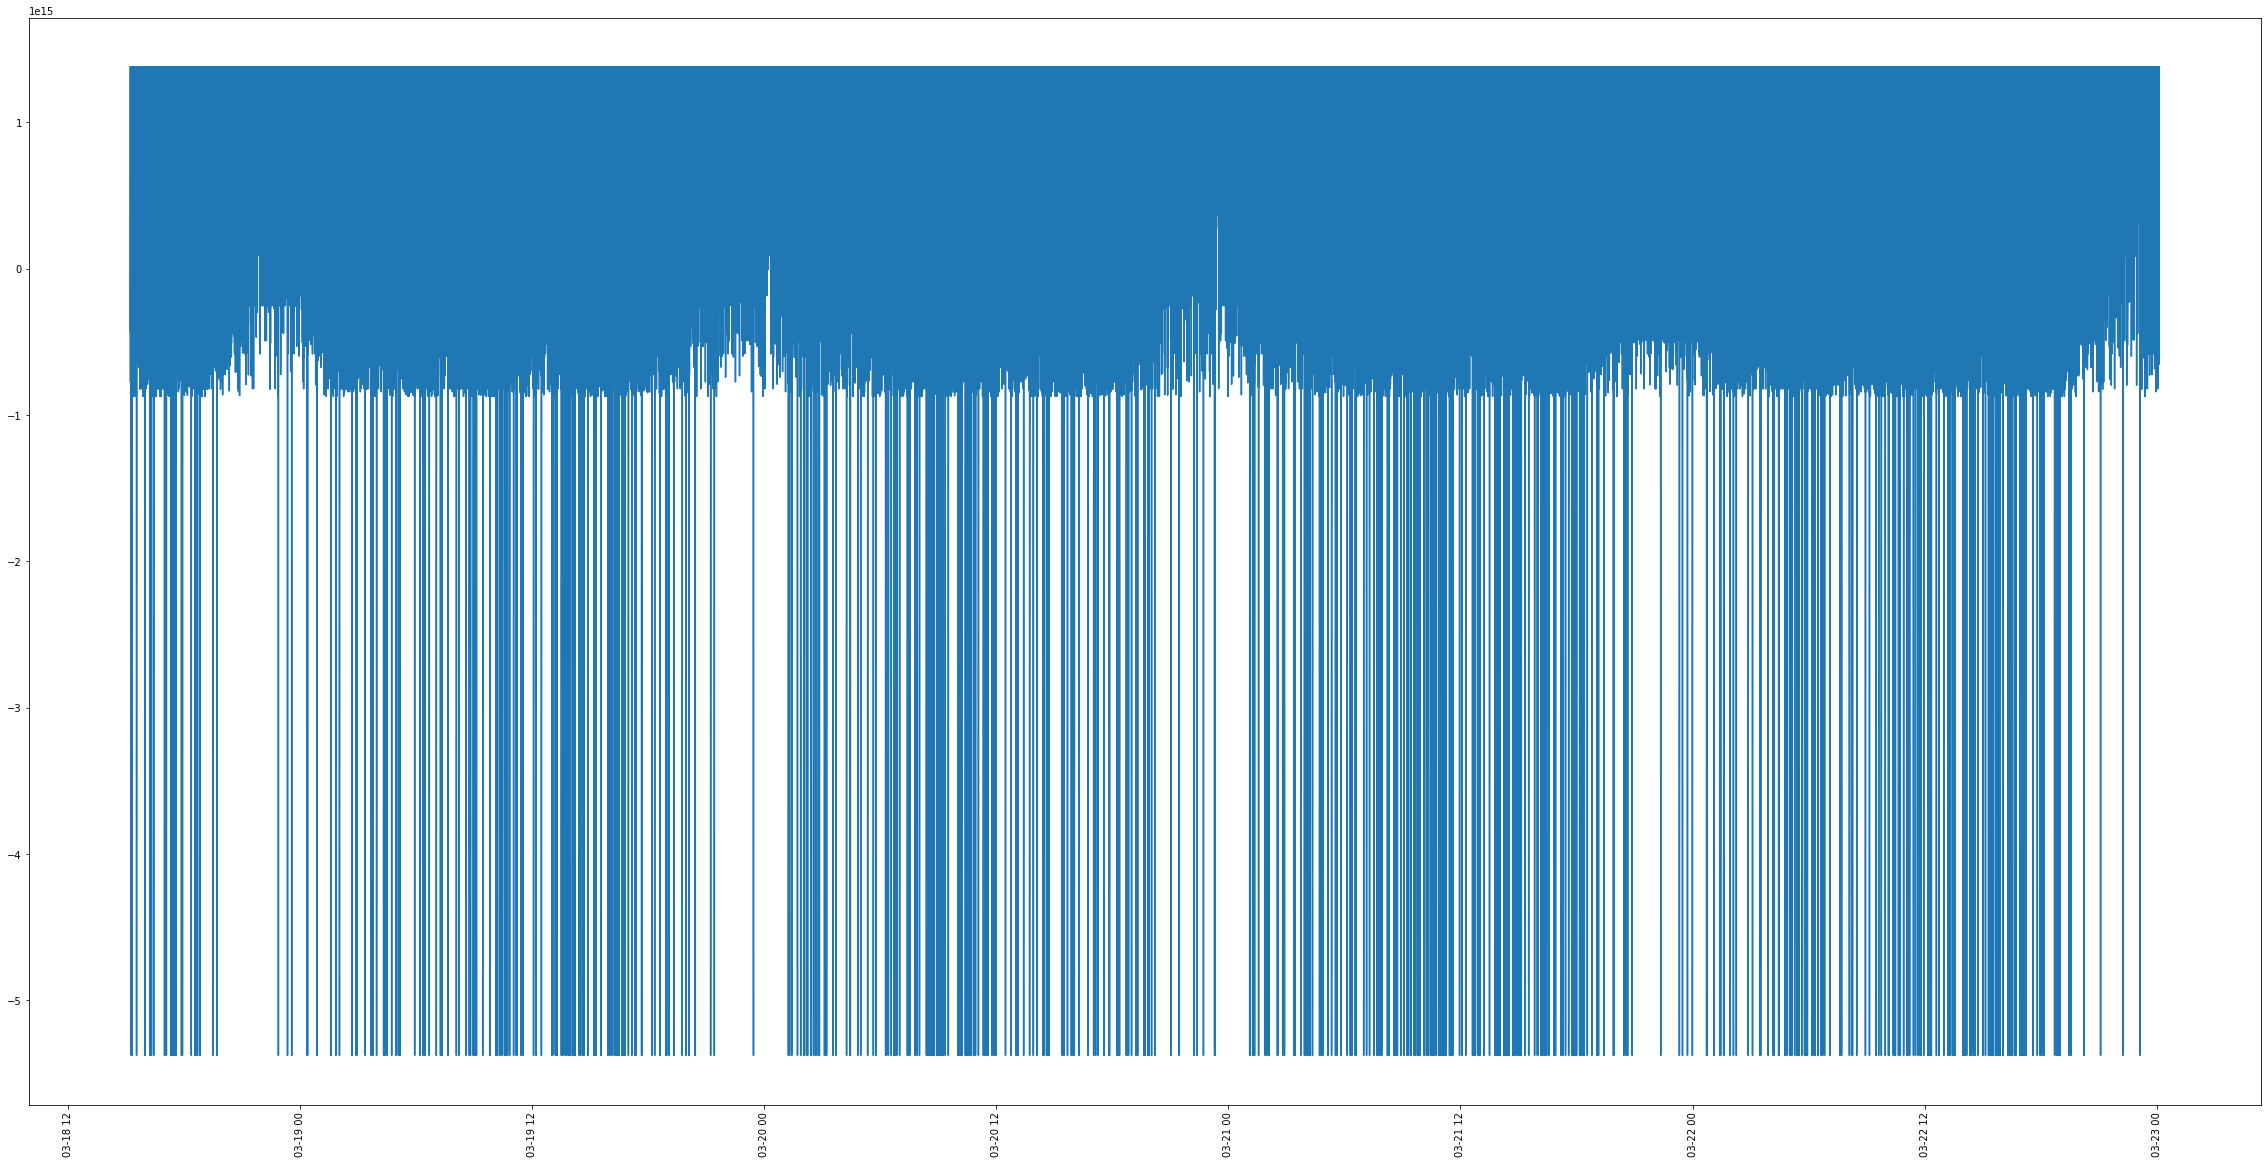

In [31]:
plt.figure(figsize=(40,20))
df["Year"] = df["updated_at"].apply(lambda x: x.year)
df = df[df["Year"]<=2022]
plt.plot(df["updated_at"],df["pratilipi_id"])
plt.xticks(rotation=90)

(array([19069.5, 19070. , 19070.5, 19071. , 19071.5, 19072. , 19072.5,
        19073. , 19073.5, 19074. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

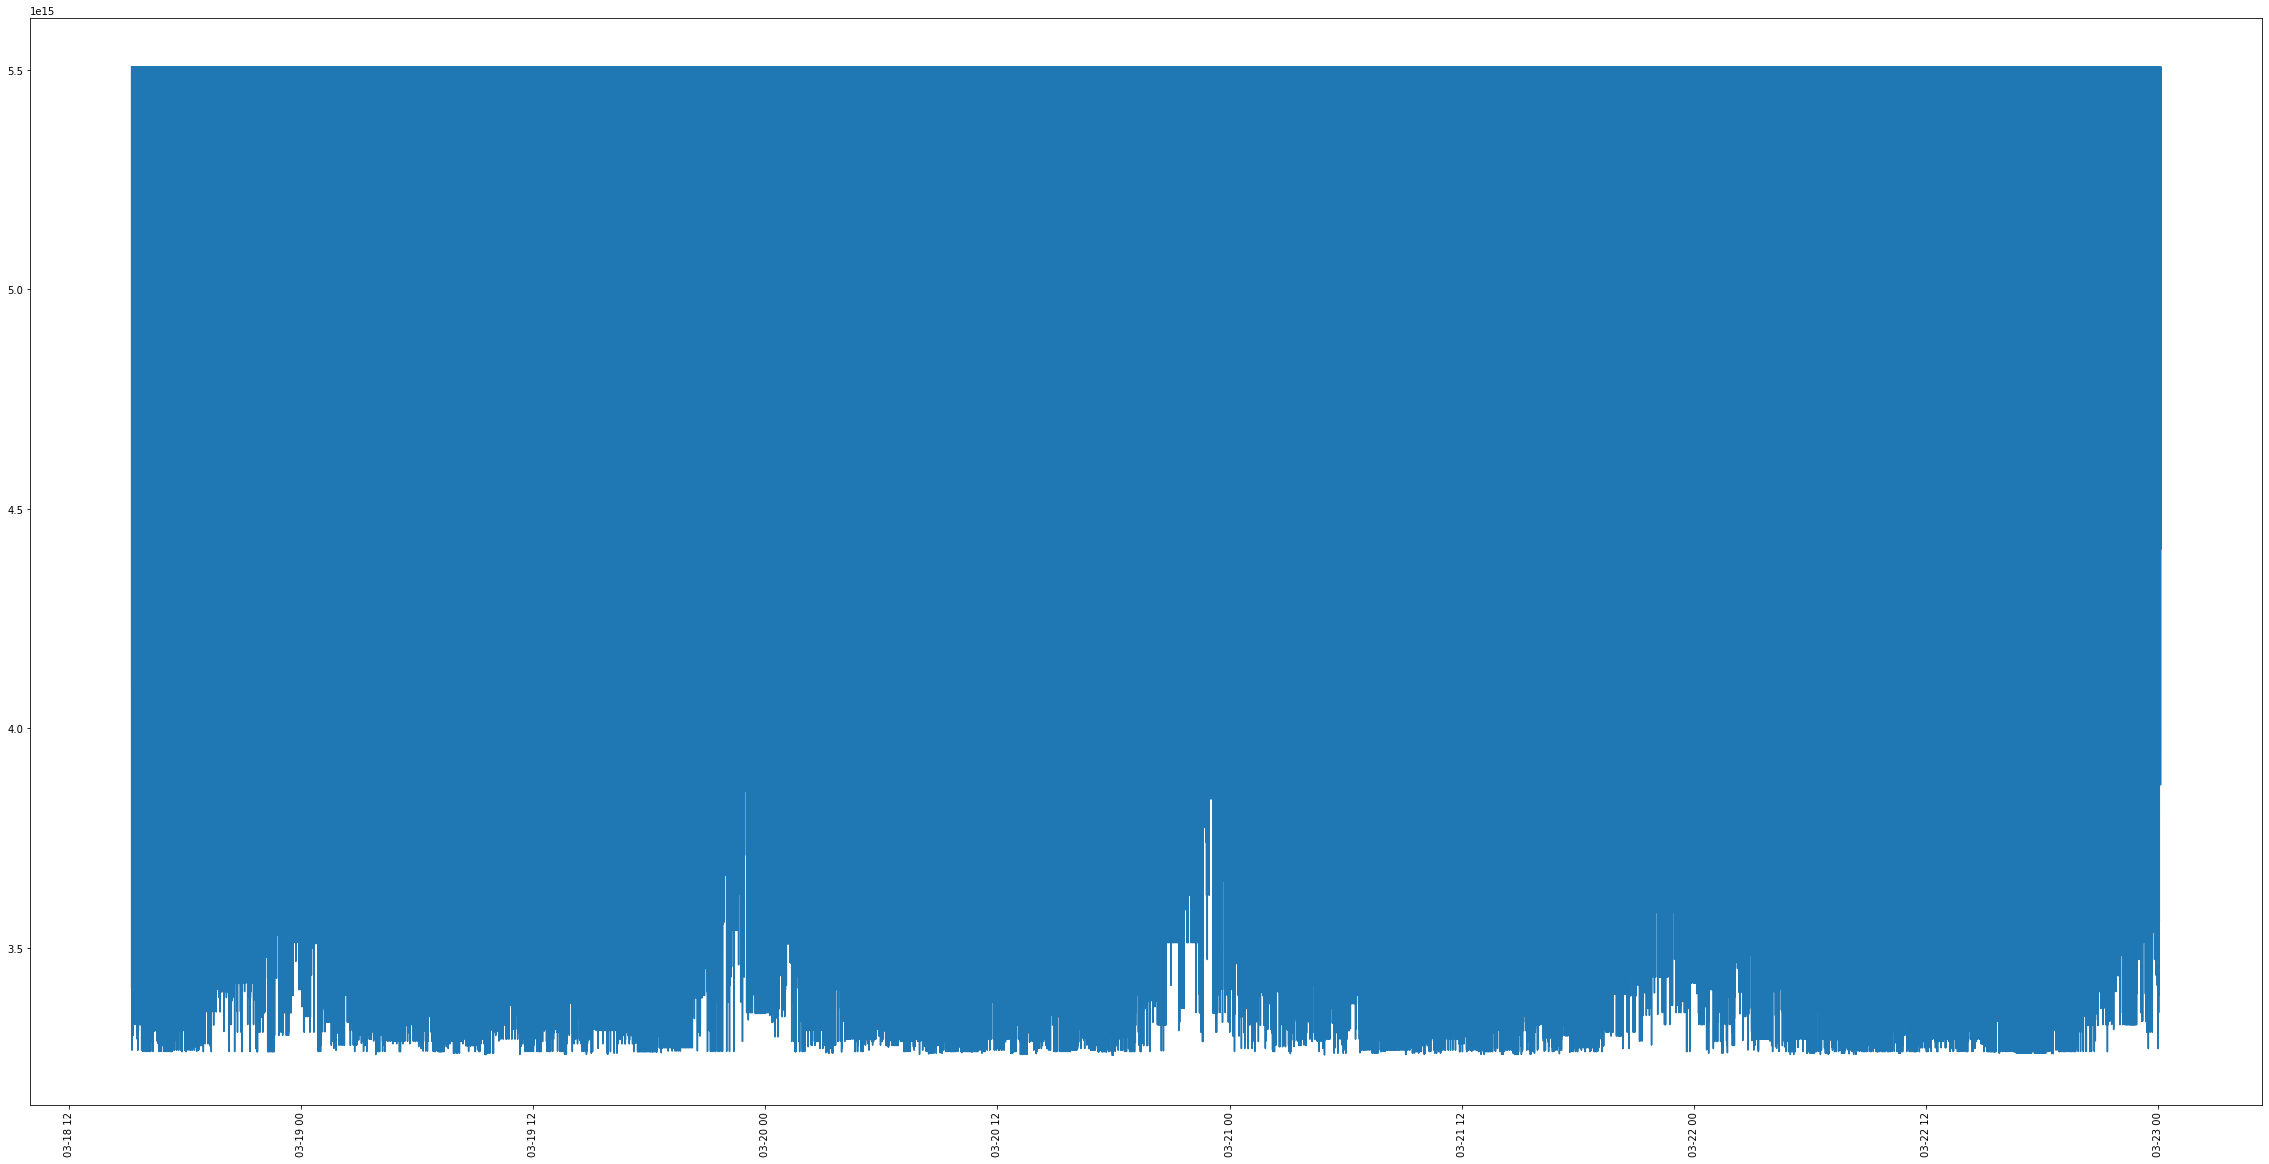

In [34]:
plt.figure(figsize=(40,20))
df["Year"] = df["updated_at"].apply(lambda x: x.year)
df = df[df["Year"]<=2022]
plt.plot(df["updated_at"],df["user_id"])
plt.xticks(rotation=90)

In [49]:
data = df[["updated_at","pratilipi_id"]]
data.dropna(inplace=True)
data.columns=["ds","y"]
data.head()

,ds,y
0,2022-03-23 00:08:26.227,1377786220672965
1,2022-03-23 00:08:26.220,1377786219742624
2,2022-03-23 00:08:26.020,1377786217096334
3,2022-03-23 00:08:25.306,1377786224767880
4,2022-03-23 00:08:25.250,1377786218111595


In [52]:
data = data.drop_duplicates(subset="ds")

In [53]:
data.head()

,ds,y
0,2022-03-23 00:08:26.227,1377786220672965
1,2022-03-23 00:08:26.220,1377786219742624
2,2022-03-23 00:08:26.020,1377786217096334
3,2022-03-23 00:08:25.306,1377786224767880
4,2022-03-23 00:08:25.250,1377786218111595


# 2.Train Model

In [55]:

m = NeuralProphet()
model = m.fit(data,freq="W")

MemoryError: cannot allocate memory for array